<a href="https://colab.research.google.com/github/shivani-202/Biomedical-Document-Classification/blob/main/dataset01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/cancerdocs.csv', encoding='latin-1')
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


(None,
         Unnamed: 0
 count  7570.000000
 mean   3784.500000
 std    2185.415102
 min       0.000000
 25%    1892.250000
 50%    3784.500000
 75%    5676.750000
 max    7569.000000)



*   data has no null values
*   it's shape is (7570, 3)



In [ ]:
#check duplicate values, null and missing values
df.fillna(df.mean(), inplace=True)
df.fillna('', inplace=True)

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
0,0
a,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.rename(columns={'0': 'labels', 'a': 'text'})
df.head()

,Unnamed: 0,labels,text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


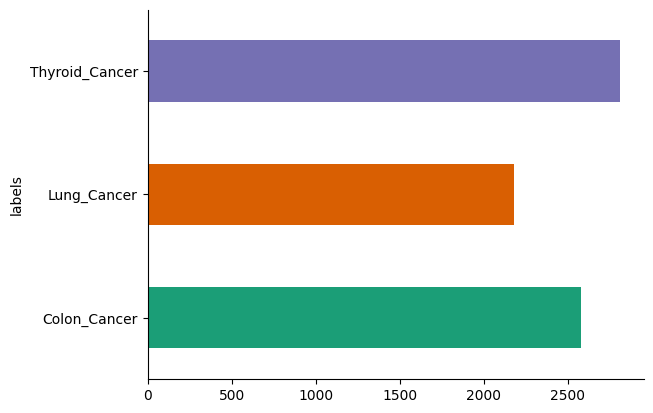

In [ ]:
#labels
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['labels'].value_counts()

,count
labels,
Thyroid_Cancer,2810
Colon_Cancer,2580
Lung_Cancer,2180




*   The classification problem involves three distinct classes


1.   Thyroid Cancer
2. Colon Cancer
3. Lung Canger







Check for outliers

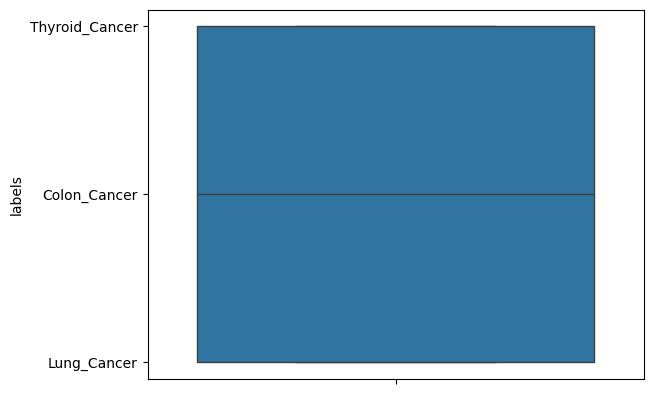

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(df['labels'])
    plt.show()



*   No outliers
*   The plot suggests a balanced distribution without major deviations as all three cancer categories seem to have similar ranges and medians.



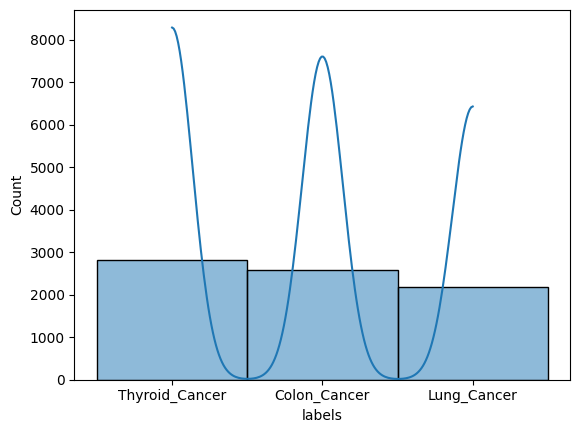

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(df['labels'], kde=True)
    plt.show()


In [ ]:
#descriptive statistics
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df[['text', 'word_count']].head())
print(df['word_count'].describe())

                                                text  word_count
0  Thyroid surgery in  children in a single insti...        2871
1  " The adopted strategy was the same as that us...        2494
2  coronary arterybypass grafting thrombosis ï¬b...        2954
3   Solitary plasmacytoma SP of the skull is an u...        1880
4   This study aimed to investigate serum matrix ...        3037
count    7570.000000
mean     3484.939102
std      1349.791031
min        80.000000
25%      2496.000000
50%      4191.000000
75%      4478.000000
max      5259.000000
Name: word_count, dtype: float64


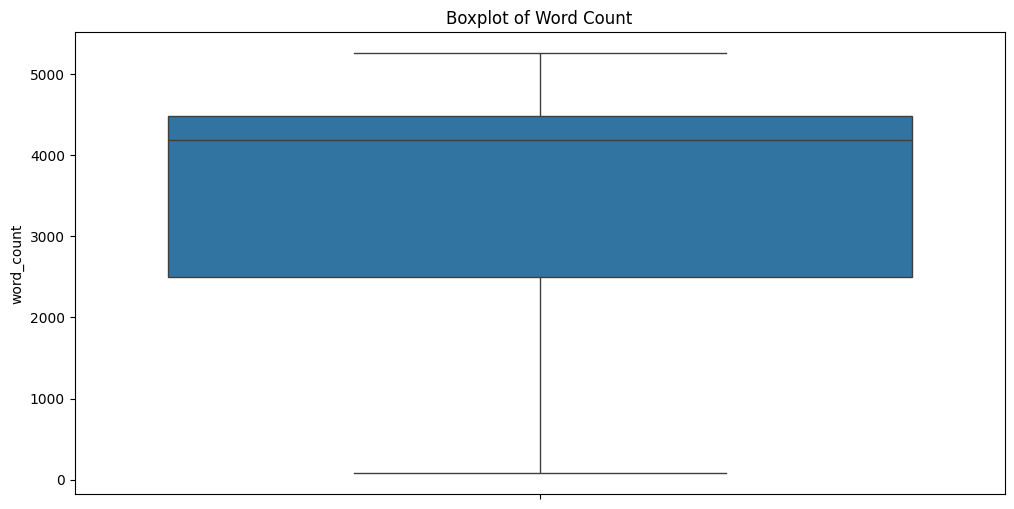

Outliers:
0


In [ ]:
# outlier detection and boxplot
plt.figure(figsize=(12,6))
sns.boxplot(df['word_count'])
plt.title('Boxplot of Word Count')
plt.show()

#identify outliers (documents with unusually high/low word count)

Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['word_count'] < Q1 - 1.5 * IQR) | (df['word_count'] > Q3 + 1.5 * IQR)]
print("Outliers:")
print(len(outliers))

The word count data is spread around 3,000 to 4,500 words for most documents, with some variation up to 5,000 and no extreme outliers.

In [ ]:
#removing outliers(optional)
df_cleaned = df[(df['word_count'] >= Q1 - 1.5 * IQR) & (df['word_count'] <= Q3 + 1.5 * IQR)]
print("Cleaned DataFrame:")
print(df_cleaned.head())

Cleaned DataFrame:
   Unnamed: 0          labels  \
0           0  Thyroid_Cancer   
1           1  Thyroid_Cancer   
2           2  Thyroid_Cancer   
3           3  Thyroid_Cancer   
4           4  Thyroid_Cancer   

                                                text  word_count  
0  Thyroid surgery in  children in a single insti...        2871  
1  " The adopted strategy was the same as that us...        2494  
2  coronary arterybypass grafting thrombosis ï¬b...        2954  
3   Solitary plasmacytoma SP of the skull is an u...        1880  
4   This study aimed to investigate serum matrix ...        3037  


In [ ]:
#check for null values again after cleaning
print(df_cleaned.isnull().sum())
df_cleaned.dropna(inplace=True)

Unnamed: 0    0
labels        0
text          0
word_count    0
dtype: int64


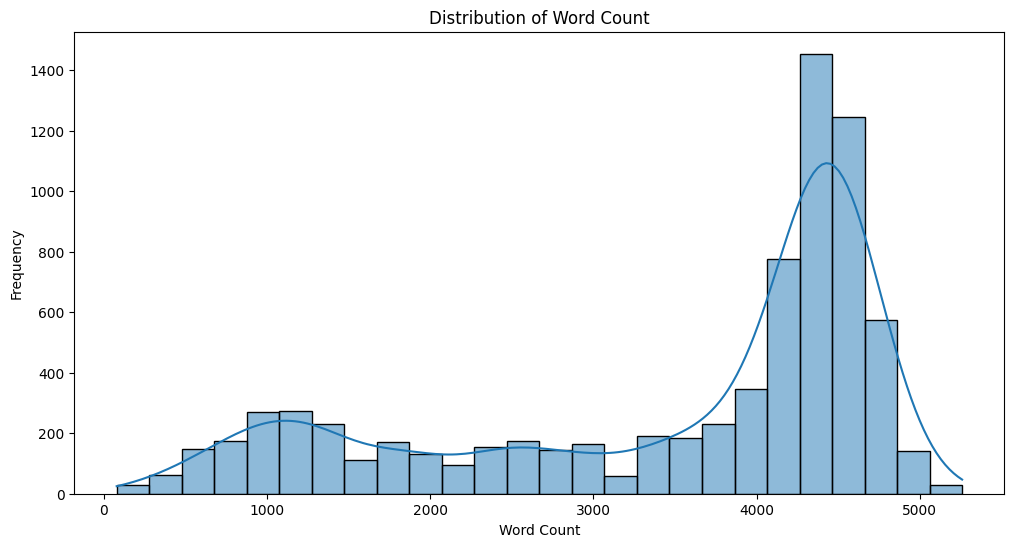

In [ ]:
#distribution pattern
plt.figure(figsize=(12,6))
sns.histplot(df_cleaned['word_count'], kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#sample mean of word count
sample_mean = df_cleaned['word_count'].mean()
print(f'Sample Mean:  {sample_mean}')

#sample standard deviation
sample_std = df_cleaned['word_count'].std()
print(f'Sample Standard Deviation:  {sample_std}')

#percentiles

p_25 = df_cleaned['word_count'].quantile(0.25)
p_75 = df_cleaned['word_count'].quantile(0.75)
print(f'25th Percentile: {p_25}')
print(f'75th Percentile: {p_75}')

#median and thrid quartile
median = df_cleaned['word_count'].median()
third_quartile = df_cleaned['word_count'].quantile(0.75)
print(f'Median: {median}')
print(f'Third Quartile:  {third_quartile}')


Sample Mean:  3484.939101717305
Sample Standard Deviation:  1349.791030979305
25th Percentile: 2496.0
75th Percentile: 4478.0
Median: 4191.0
Third Quartile:  4478.0


In [ ]:
#trimmed mean
from scipy.stats import trim_mean
data_cleaned = df_cleaned.copy()
trim_fraction = 0.1  # 10% of the data will be trimmed from both ends
trimmed_mean = trim_mean(data_cleaned['word_count'], proportiontocut=trim_fraction)
print(f'Trimmed Mean: {trimmed_mean}')

#trimmed median
trimmed_median = data_cleaned['word_count'].median()
print(f'Trimmed Median: {trimmed_median}')

#trimmed standard deviation
trimmed_std = data_cleaned['word_count'].std()
print(f'Trimmed Standard Deviation: {trimmed_std}')


Trimmed Mean: 3659.473249669749
Trimmed Median: 4191.0
Trimmed Standard Deviation: 1349.791030979305


In [ ]:
import random
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess and augment text
def preprocess_and_augment(text):
    # Lowercase conversion
    text = text.lower()

    # Tokenize and remove stop words
    words = [word for word in text.split() if word not in stop_words]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # Synonym replacement (replacing 10% of words with 'synonym' placeholder)
    new_words = [word if random.random() > 0.1 else 'synonym' for word in words]

    return ' '.join(new_words)

# Apply preprocessing and augmentation to the text column
df_cleaned['augmented_text'] = df_cleaned['text'].apply(preprocess_and_augment)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


vectorizer = TfidfVectorizer(max_features=100)  # Convert text to 100 TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df_cleaned['augmented_text'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())

    a0  activity       age        al      also  analysis  assay  associated  \
0  0.0  0.000000  0.074540  0.134594  0.005121  0.005167    0.0    0.011635   
1  0.0  0.000000  0.000000  0.033022  0.006282  0.012676    0.0    0.007137   
2  0.0  0.015829  0.008994  0.097439  0.005561  0.016831    0.0    0.037904   
3  0.0  0.000000  0.000000  0.043875  0.000000  0.000000    0.0    0.000000   
4  0.0  0.000000  0.037849  0.073810  0.014041  0.047221    0.0    0.005317   

   association    author  ...  treatment     tumor       two      type  \
0     0.008026  0.006158  ...   0.017541  0.013341  0.011218  0.018855   
1     0.000000  0.007555  ...   0.007173  0.000000  0.041284  0.007710   
2     0.052290  0.000000  ...   0.006349  0.000000  0.006091  0.000000   
3     0.000000  0.010037  ...   0.019060  0.000000  0.009142  0.000000   
4     0.000000  0.011257  ...   0.037408  0.091454  0.010253  0.011489   

   university       use      used     using     value      year  
0    0.013391 

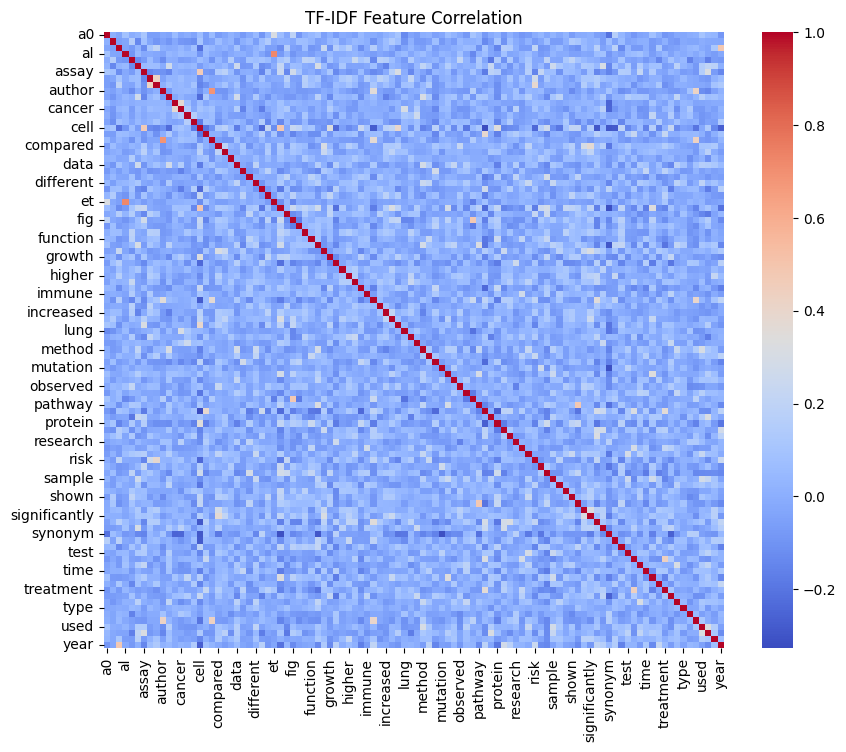

In [ ]:
# Calculate the correlation matrix for TF-IDF features
correlation_matrix = tfidf_df.corr()

# Plot a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('TF-IDF Feature Correlation')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score
)


# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to speed up computation
X_tfidf = tfidf.fit_transform(X)

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = {}

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
        else:
            y_prob = None  # No probability predictions available

        # Collect all evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Use ROC-AUC and Log-Loss only if probability predictions are available
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
        loss = log_loss(y_test, y_prob) if y_prob is not None else 'N/A'

        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        results[split] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc,
            'Confusion Matrix': cm,
            'Log-Loss': loss,
            'MCC': mcc,
            'Cohen\'s Kappa': kappa
            'Adjusted R^2': adjusted_r2,
            'Adjusted RMSE': adjusted_rmse
        }

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    'SVM': SVC(kernel='linear', probability=True),  # Ensure probability=True for SVM
}

# Running experiments for all models
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


Running experiments for Logistic Regression...

Train-Test Split: 50.0-50.0
Accuracy: 0.9178335535006605
Precision: 0.924009912568735
Recall: 0.923876734177977
F1-Score: 0.9239368773643742
AUC-ROC: 0.9881717499061732
Confusion Matrix: [[1156    0  160]
 [   0 1055    0]
 [ 151    0 1263]]
Log-Loss: 0.32021533035779165
MCC: 0.8758510896109489
Cohen's Kappa: 0.8758436023966081

Train-Test Split: 60.0-40.0
Accuracy: 0.928335535006605
Precision: 0.9339668656873373
Recall: 0.9335159358378355
F1-Score: 0.9336957872538133
AUC-ROC: 0.9910893886297593
Confusion Matrix: [[ 932    0  118]
 [   0  841    0]
 [  99    0 1038]]
Log-Loss: 0.2949563343724348
MCC: 0.8917066495310985
Cohen's Kappa: 0.8916535206636699

Train-Test Split: 70.0-30.0
Accuracy: 0.9326287978863936
Precision: 0.9387968064153619
Recall: 0.9380556027405017
F1-Score: 0.9382126048396938
AUC-ROC: 0.992111235330615
Confusion Matrix: [[720   0  92]
 [  0 618   0]
 [ 61   0 780]]
Log-Loss: 0.27554572404725286
MCC: 0.8982981246079099
Co

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score
)


# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to speed up computation
X_tfidf = tfidf.fit_transform(X)

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = {}

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
        else:
            y_prob = None  # No probability predictions available

        # Collect all evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Use ROC-AUC and Log-Loss only if probability predictions are available
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
        loss = log_loss(y_test, y_prob) if y_prob is not None else 'N/A'

        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        results[split] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc,
            'Confusion Matrix': cm,
            'Log-Loss': loss,
            'MCC': mcc,
            'Cohen\'s Kappa': kappa
        }

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True),  # Ensure probability=True for SVM
}

# Running experiments for all models
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


Running experiments for Logistic Regression...

Train-Test Split: 50.0-50.0
Accuracy: 0.9252311756935271
Precision: 0.9307674746525213
Recall: 0.9308811580246171
F1-Score: 0.9308178035156311
AUC-ROC: 0.9889249487249915
Confusion Matrix: [[1179    0  137]
 [   0 1055    0]
 [ 146    0 1268]]
Log-Loss: 0.3138829779030534
MCC: 0.8870502667537469
Cohen's Kappa: 0.8870426866241407

Train-Test Split: 60.0-40.0
Accuracy: 0.9286657859973579
Precision: 0.9340160557832972
Recall: 0.9341248900615655
F1-Score: 0.934065934065934
AUC-ROC: 0.9914757257588437
Confusion Matrix: [[ 945    0  105]
 [   0  841    0]
 [ 111    0 1026]]
Log-Loss: 0.28928594750618464
MCC: 0.892196774759339
Cohen's Kappa: 0.8921914776199998

Train-Test Split: 70.0-30.0
Accuracy: 0.9308674592690445
Precision: 0.9368876897660733
Recall: 0.9365268104863823
F1-Score: 0.9366273458346841
AUC-ROC: 0.992426597598441
Confusion Matrix: [[724   0  88]
 [  0 618   0]
 [ 69   0 772]]
Log-Loss: 0.2679447644482939
MCC: 0.8954847473503387
Co

Running experiments for Logistic Regression...
Running experiments for Multinomial NB...
Running experiments for Decision Tree...
Running experiments for Random Forest...
Running experiments for SVM...
Running experiments for XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:55:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:57:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:00:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:02:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Running experiments for Gradient Boosting...
Running experiments for Ensemble (Voting)...
                  Model Train-Test Split  Accuracy  Precision    Recall  \
0   Logistic Regression            50-50  0.925231   0.930767  0.930881   
1   Logistic Regression            60-40  0.928666   0.934016  0.934125   
2   Logistic Regression            70-30  0.930867   0.936888  0.936527   
3   Logistic Regression            80-20  0.935931   0.941145  0.941847   
4        Multinomial NB            50-50  0.885601   0.893923  0.893414   
5        Multinomial NB            60-40  0.897952   0.905009  0.905378   
6        Multinomial NB            70-30  0.896962   0.904885  0.905512   
7        Multinomial NB            80-20  0.901585   0.908872  0.910076   
8         Decision Tree            50-50  0.959313   0.961277  0.961846   
9         Decision Tree            60-40  0.967966   0.969573  0.970124   
10        Decision Tree            70-30  0.964333   0.966825  0.966314   
11        

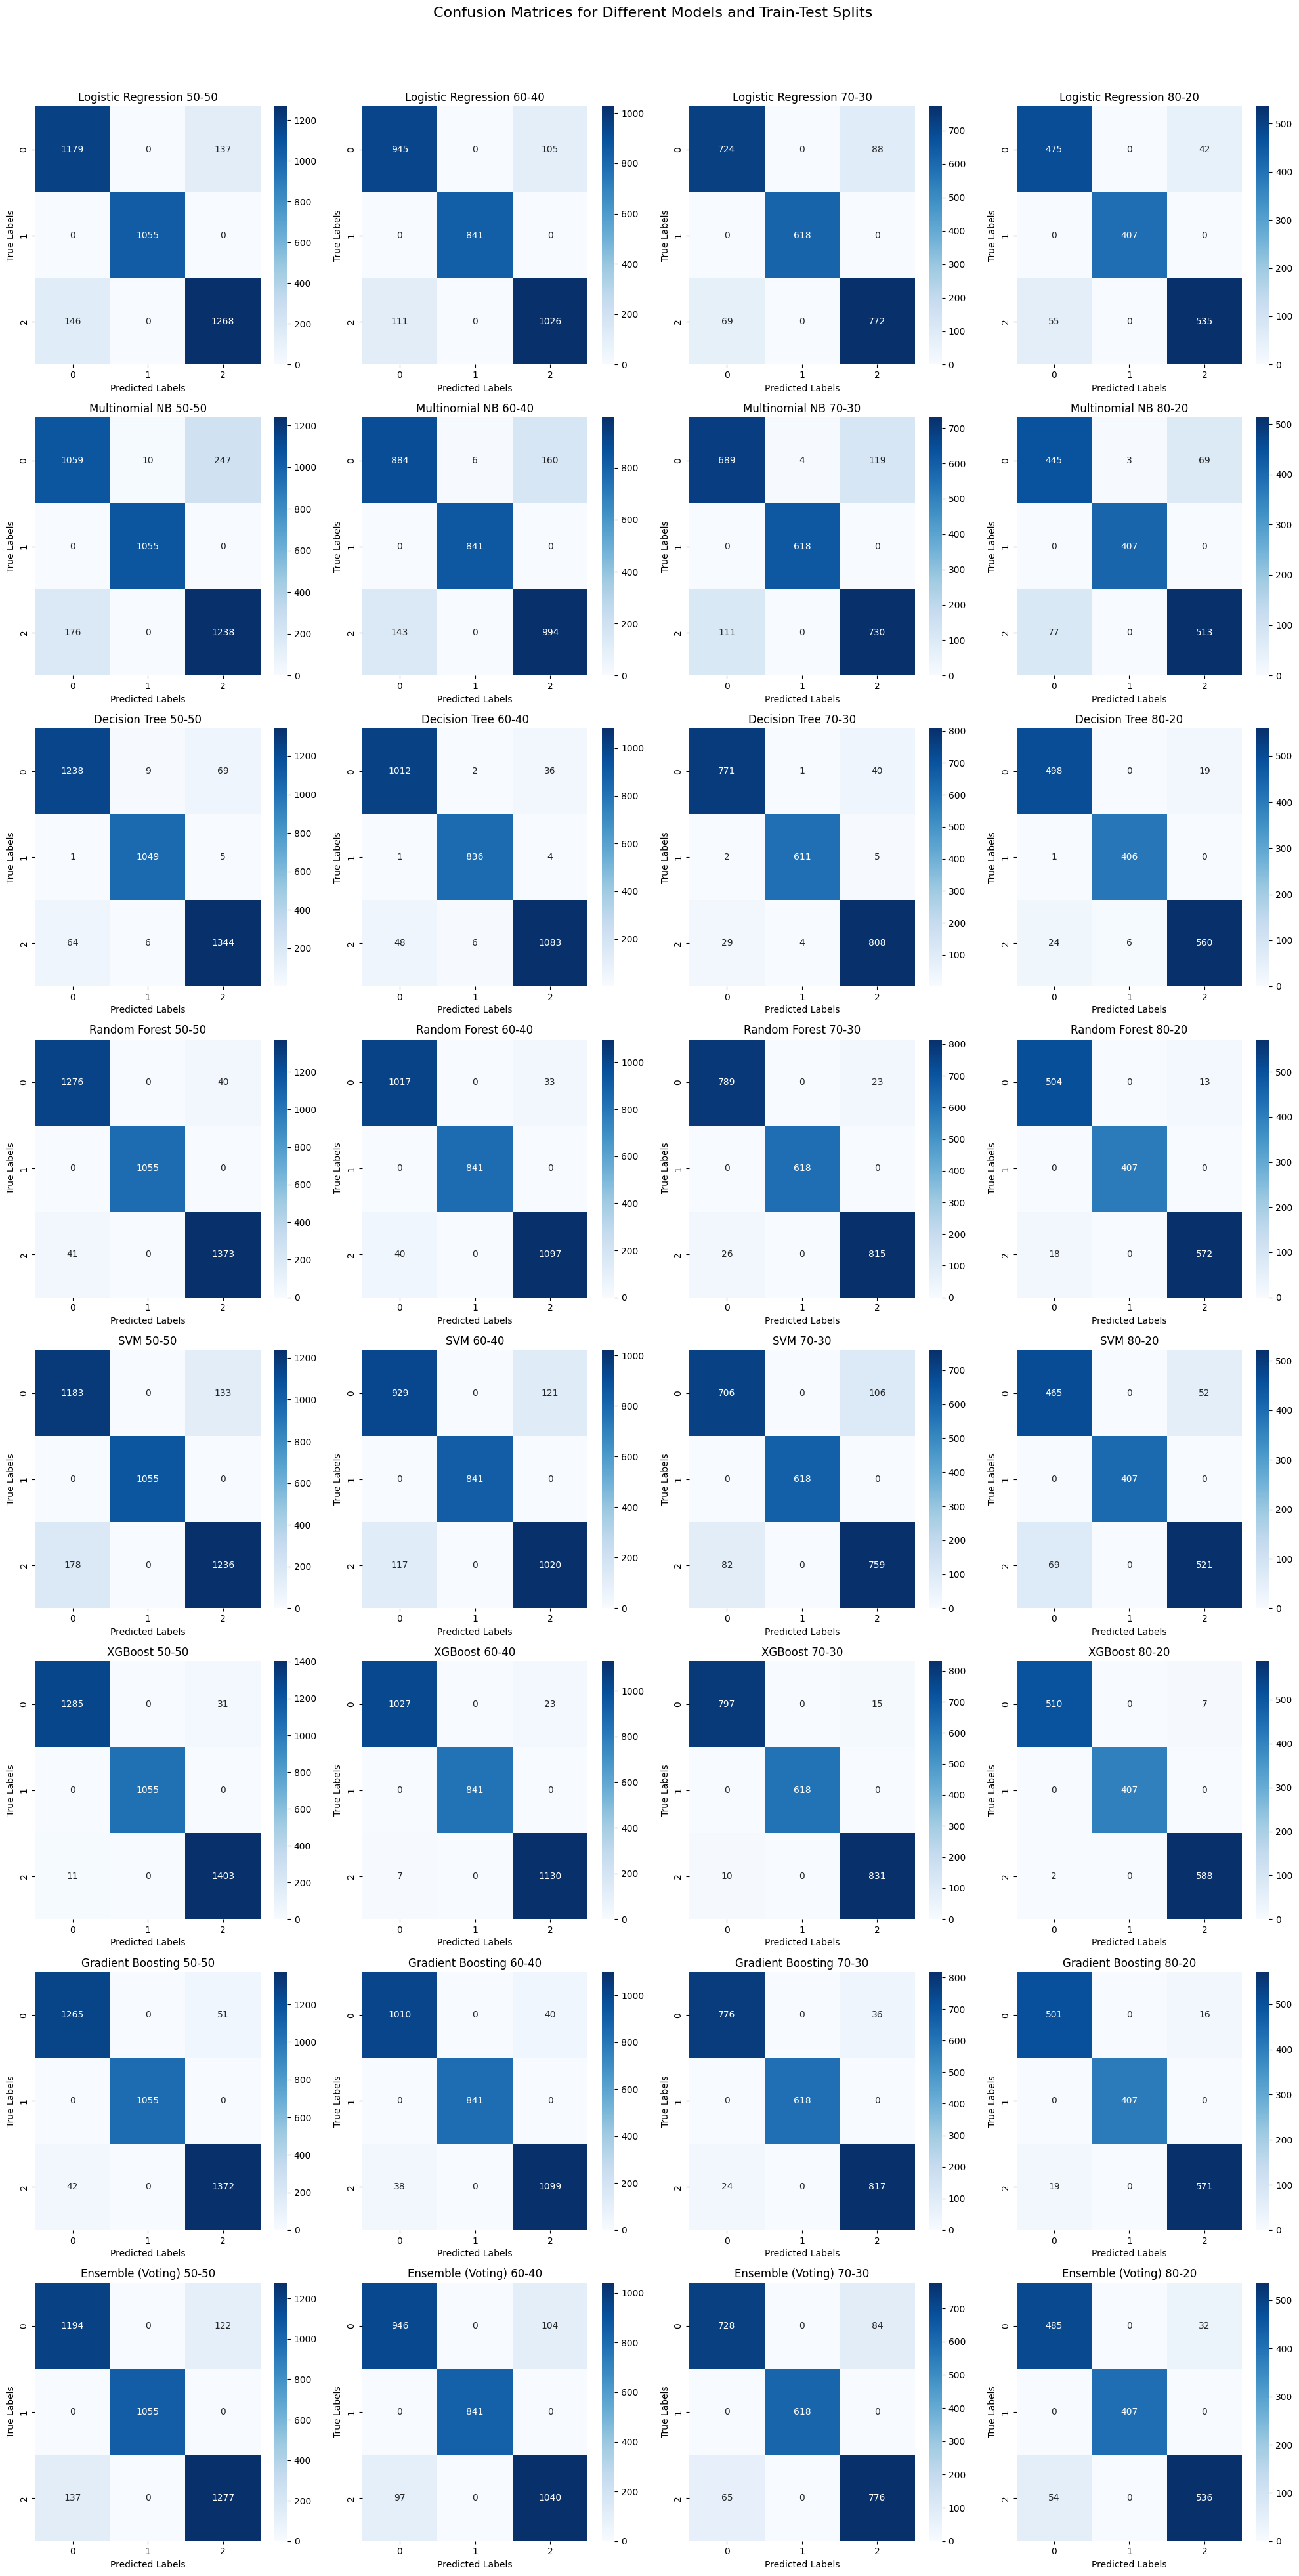

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score,
    balanced_accuracy_score
)
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to speed up computation
X_tfidf = tfidf.fit_transform(X)

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = []

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
            loss = log_loss(y_test, y_prob)
        else:
            auc = 'N/A'
            loss = 'N/A'

        # Collect all evaluation metrics
        metrics = {
            'Model': model_name,
            'Train-Test Split': f"{int(split[0] * 100)}-{int(split[1] * 100)}",
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='macro'),
            'Recall': recall_score(y_test, y_pred, average='macro'),
            'F1-Score': f1_score(y_test, y_pred, average='macro'),
            'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
            'AUC-ROC': auc,
            'Log-Loss': loss,
            'MCC': matthews_corrcoef(y_test, y_pred),
            'Cohen\'s Kappa': cohen_kappa_score(y_test, y_pred),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }

        results.append(metrics)

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Ensemble (Voting)': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svm', SVC(kernel='linear', probability=True))
        ],
        voting='soft'
    )
}

# Run experiments for all models and store results in a DataFrame
all_results = []
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name)
    all_results.extend(results)

# Create DataFrame of results, excluding Confusion Matrix from the main metrics display
metrics_df = pd.DataFrame(all_results).drop(columns=['Confusion Matrix'])
print(metrics_df)

# Plot confusion matrices for each model and split
fig, axes = plt.subplots(len(models), 4, figsize=(20, len(models) * 5))
fig.suptitle("Confusion Matrices for Different Models and Train-Test Splits", fontsize=16)

for i, (name, model) in enumerate(models.items()):
    model_results = [res for res in all_results if res['Model'] == name]
    for j, result in enumerate(model_results):
        cm = result['Confusion Matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, j])
        axes[i, j].set_title(f"{name} {result['Train-Test Split']}")
        axes[i, j].set_xlabel('Predicted Labels')
        axes[i, j].set_ylabel('True Labels')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
metrics_df.to_excel("/mnt/data/metrics_results.xlsx", index=False)

NameError: name 'metrics_df' is not defined

Running experiments for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Running experiments for Multinomial NB...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Running experiments for Decision Tree...
Running experiments for Random Forest...
Running experiments for SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Running experiments for XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Running experiments for Gradient Boosting...
Running experiments for Ensemble (Voting)...
                  Model Train-Test Split  Accuracy  Precision    Recall  \
0   Logistic Regression            50-50  0.394716   0.256940  0.387248   
1   Logistic Regression            60-40  0.389366   0.251959  0.381142   
2   Logistic Regression            70-30  0.387494   0.250144  0.383688   
3   Logistic Regression            80-20  0.402246   0.368329  0.384952   
4        Multinomial NB            50-50  0.373580   0.124527  0.333333   
5        Multinomial NB            60-40  0.375495   0.125165  0.333333   
6        Multinomial NB            70-30  0.370321   0.123440  0.333333   
7        Multinomial NB            80-20  0.389696   0.129899  0.333333   
8         Decision Tree            50-50  0.353765   0.351886  0.352800   
9         Decision Tree            60-40  0.350066   0.347435  0.348129   
10        Decision Tree            70-30  0.343461   0.339612  0.339952   
11        

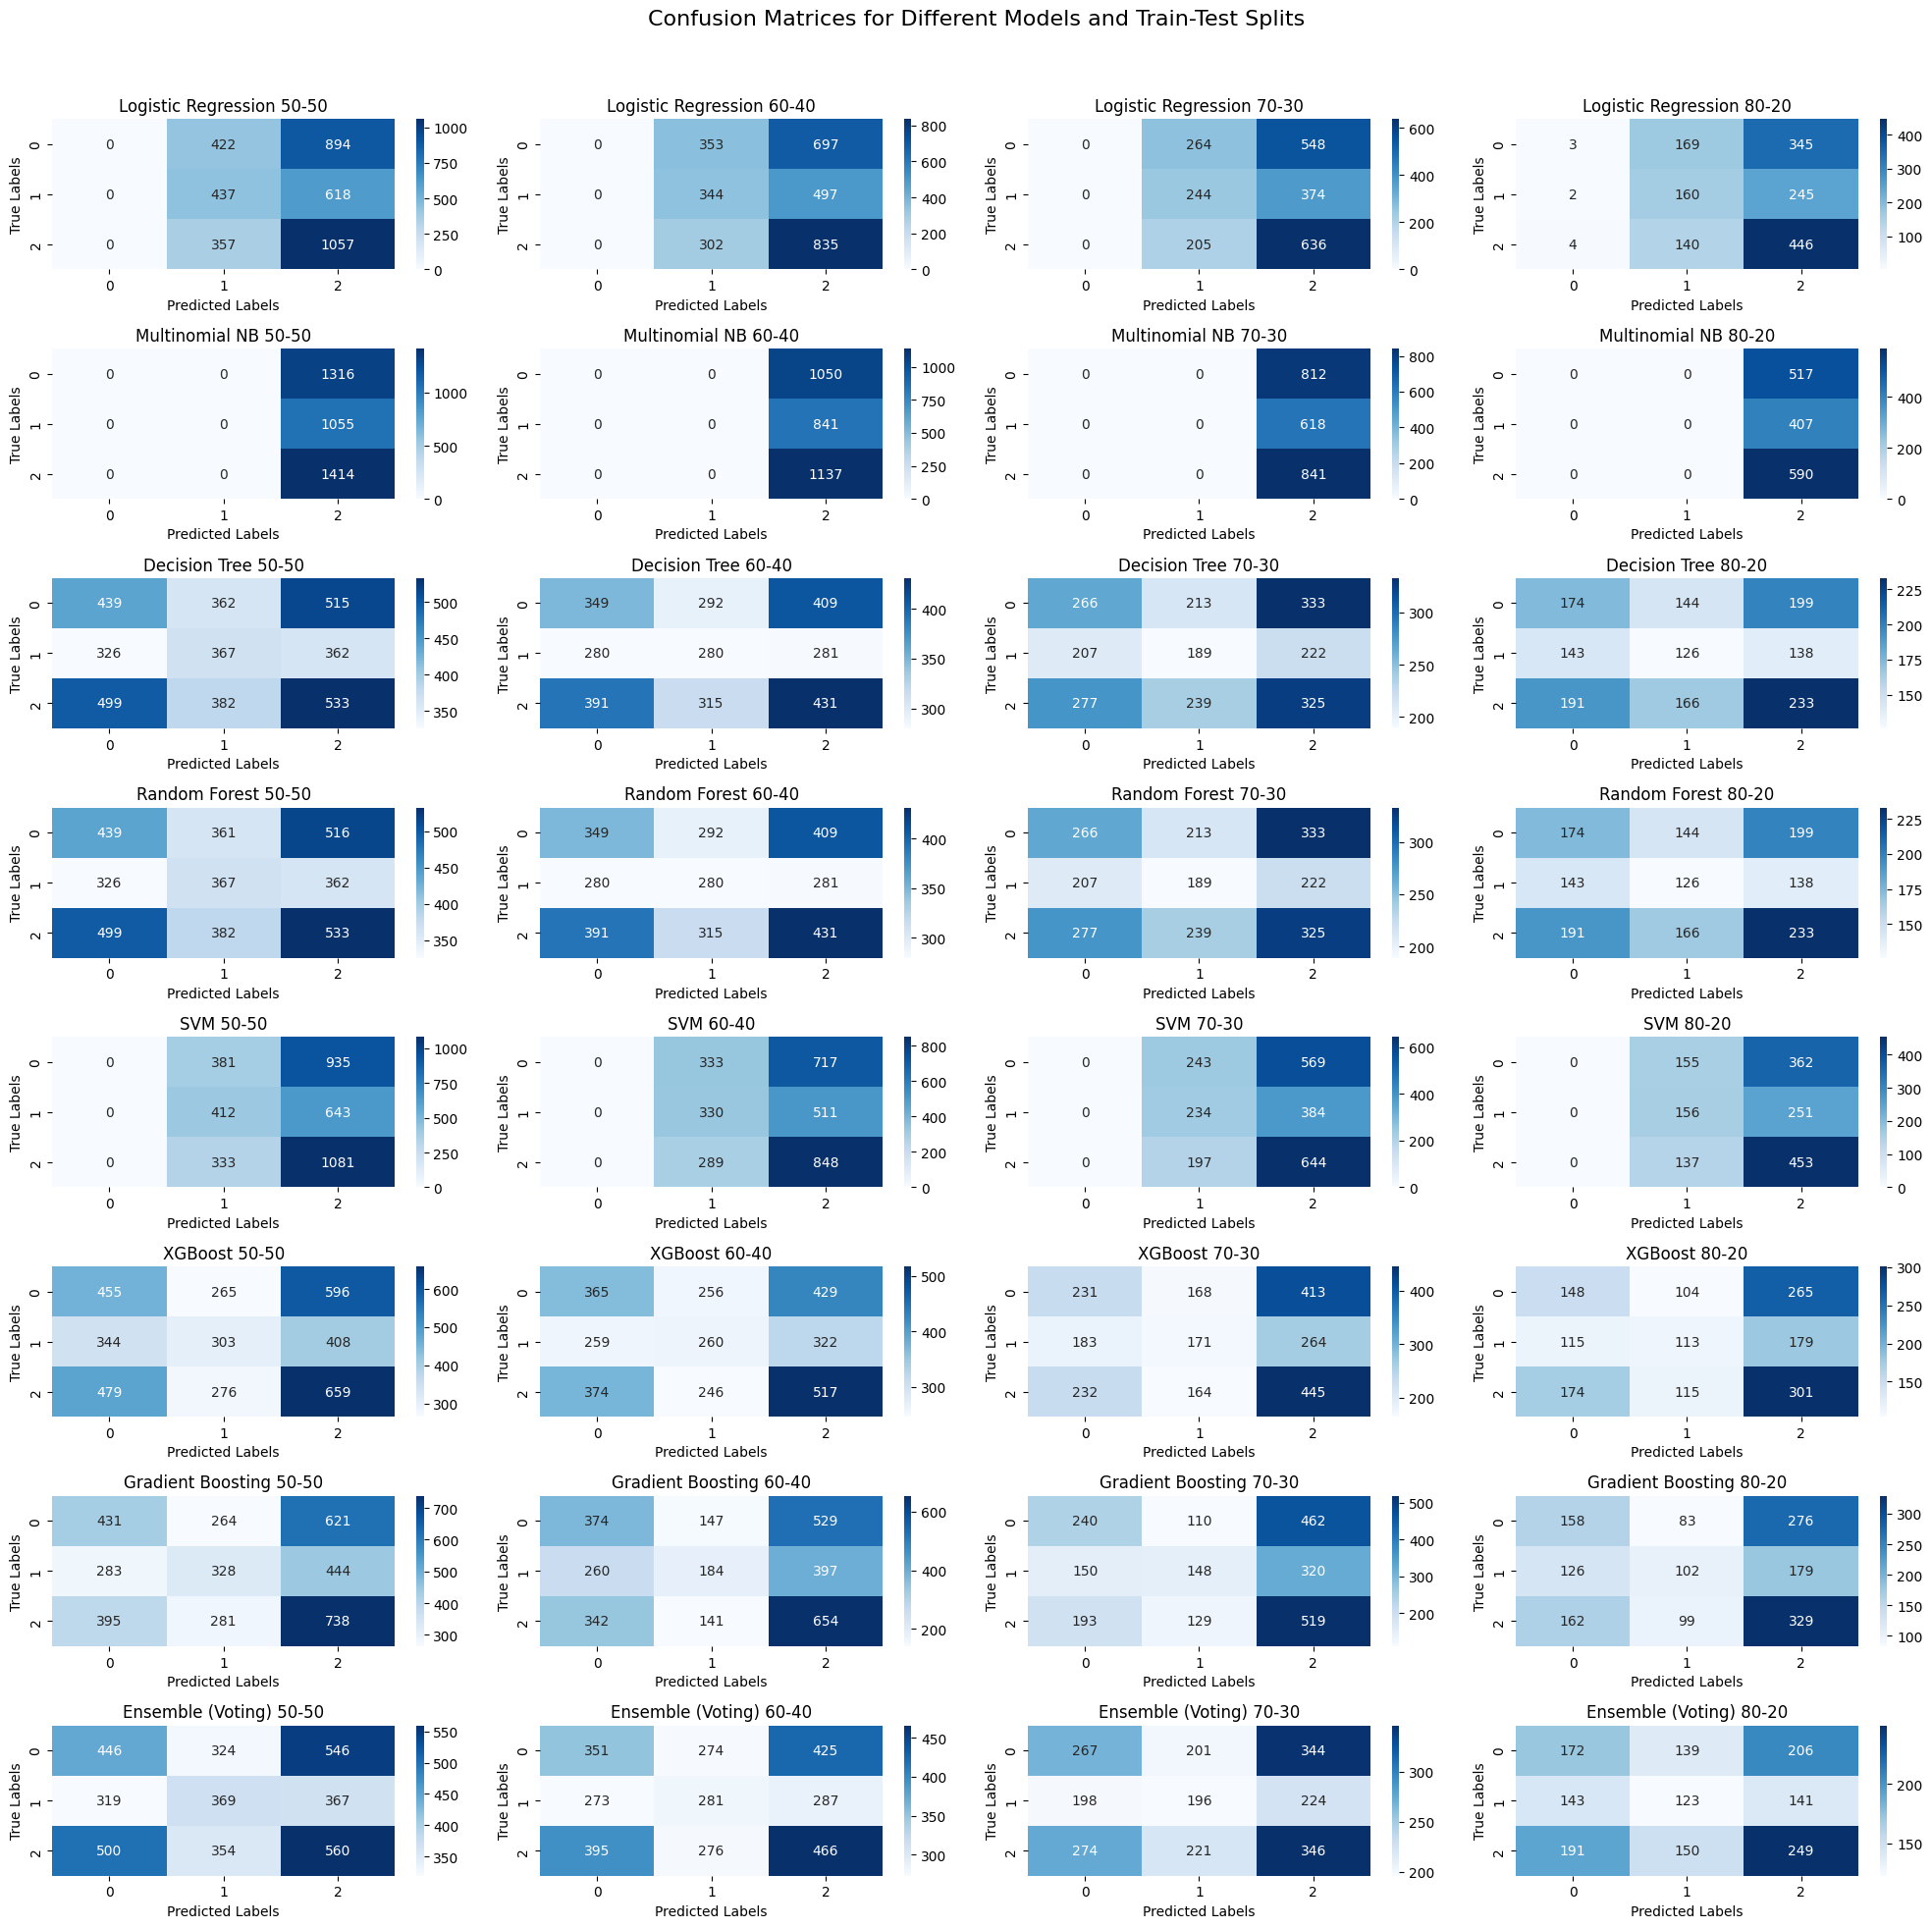

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold


X = df_cleaned['augmented_text']
y = df_cleaned['labels']

# Vectorize the text data and apply TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Apply feature selection (assuming variance_threshold and columns_to_drop were defined)
variance_threshold = VarianceThreshold(threshold=0.01)
X_tfidf_selected = variance_threshold.fit_transform(X_tfidf)
X_tfidf_selected = pd.DataFrame(X_tfidf_selected.toarray(), columns=vectorizer.get_feature_names_out()[variance_threshold.get_support()])
# X_tfidf_selected = X_tfidf_selected.drop(columns=columns_to_drop, axis=1)

# Function to run cross-validation and different train-test splits with each model
def run_experiment(model, model_name, X_tfidf, y):
    results = []
    splits = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

    le = LabelEncoder()
    y = le.fit_transform(y)

    for train_size, test_size in splits:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=test_size, random_state=42)

        # 5-fold cross-validation predictions on training set
        y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)

        # Train the model on the full training set and make predictions on the test set
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)

        # Probability predictions for AUC-ROC and Log-Loss, if available
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
            loss = log_loss(y_test, y_prob)
        else:
            auc = 'N/A'
            loss = 'N/A'

        # Collect all metrics
        metrics = {
            'Model': model_name,
            'Train-Test Split': f"{int(train_size*100)}-{int(test_size*100)}",
            'Accuracy': accuracy_score(y_test, y_test_pred),
            'Precision': precision_score(y_test, y_test_pred, average='macro'),
            'Recall': recall_score(y_test, y_test_pred, average='macro'),
            'F1-Score': f1_score(y_test, y_test_pred, average='macro'),
            'AUC-ROC': auc,
            'Log-Loss': loss,
            'MCC': matthews_corrcoef(y_test, y_test_pred),
            'Cohen\'s Kappa': cohen_kappa_score(y_test, y_test_pred),
            'Confusion Matrix': confusion_matrix(y_test, y_test_pred)
        }
        results.append(metrics)

    return results

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Ensemble (Voting)': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svm', SVC(kernel='linear', probability=True))
        ],
        voting='soft'
    )
}

# Run experiments for all models and store results in a DataFrame
all_results = []
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name, X_tfidf_selected, y)
    all_results.extend(results)

# Create DataFrame of results
metrics_df = pd.DataFrame(all_results).drop(columns=['Confusion Matrix'])
print(metrics_df)

# Plot confusion matrices for each model and split
fig, axes = plt.subplots(len(models), 4, figsize=(20, 20))
fig.suptitle("Confusion Matrices for Different Models and Train-Test Splits", fontsize=16)

for i, (name, model) in enumerate(models.items()):
    results = [res for res in all_results if res['Model'] == name]
    for j, result in enumerate(results):
        cm = result['Confusion Matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, j])
        axes[i, j].set_title(f"{name} {result['Train-Test Split']}")
        axes[i, j].set_xlabel('Predicted Labels')
        axes[i, j].set_ylabel('True Labels')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
import pandas as pd
import os
data = {
    'Model': [
        'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression',
        'Multinomial NB', 'Multinomial NB', 'Multinomial NB', 'Multinomial NB',
        'Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree',
        'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
        'SVM', 'SVM', 'SVM', 'SVM',
        'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost',
        'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting',
        'Ensemble (Voting)', 'Ensemble (Voting)', 'Ensemble (Voting)', 'Ensemble (Voting)'
    ],
    'Train-Test Split': [
        '50-50', '60-40', '70-30', '80-20',
        '50-50', '60-40', '70-30', '80-20',
        '50-50', '60-40', '70-30', '80-20',
        '50-50', '60-40', '70-30', '80-20',
        '50-50', '60-40', '70-30', '80-20',
        '50-50', '60-40', '70-30', '80-20',
        '50-50', '60-40', '70-30', '80-20',
        '50-50', '60-40', '70-30', '80-20'
    ],
    'Accuracy': [
        0.925231, 0.928666, 0.930867, 0.935931, 0.885601, 0.897952, 0.896962, 0.901585,
        0.959313, 0.967966, 0.964333, 0.966975, 0.978600, 0.975892, 0.978424, 0.979524,
        0.917834, 0.921400, 0.917217, 0.920079, 0.988904, 0.990092, 0.988992, 0.994055,
        0.975429, 0.974240, 0.973580, 0.976882, 0.931572, 0.933620, 0.934390, 0.943197
    ],
    'Precision': [
        0.930767, 0.934016, 0.936888, 0.941145, 0.893923, 0.905009, 0.904885, 0.908872,
        0.961277, 0.969573, 0.966825, 0.968274, 0.980187, 0.977651, 0.980217, 0.981098,
        0.924021, 0.927366, 0.924465, 0.926679, 0.989965, 0.991094, 0.989959, 0.994776,
        0.977342, 0.976207, 0.975932, 0.978735, 0.936622, 0.938697, 0.940119, 0.947825
    ],
    'Recall': [
        0.930881, 0.934125, 0.936527, 0.941847, 0.893414, 0.905378, 0.905512, 0.910076,
        0.961846, 0.970124, 0.966314, 0.969982, 0.980203, 0.977797, 0.980253, 0.981449,
        0.924351, 0.927287, 0.923985, 0.927490, 0.989555, 0.990646, 0.989879, 0.994357,
        0.977181, 0.976161, 0.975709, 0.978950, 0.936802, 0.938547, 0.939754, 0.948860
    ],
    'F1-Score': [
        0.930818, 0.934066, 0.936627, 0.941412, 0.893211, 0.905139, 0.905173, 0.909449,
        0.961547, 0.969826, 0.966540, 0.969076, 0.980195, 0.977717, 0.980233, 0.981260,
        0.924025, 0.927324, 0.924100, 0.926943, 0.989724, 0.990835, 0.989913, 0.994553,
        0.977254, 0.976184, 0.975787, 0.978837, 0.936694, 0.938615, 0.939857, 0.948098
    ],
    'Balanced Accuracy': [
        0.930881, 0.934125, 0.936527, 0.941847, 0.893414, 0.905378, 0.905512, 0.910076,
        0.961846, 0.970124, 0.966314, 0.969982, 0.980203, 0.977797, 0.980253, 0.981449,
        0.924351, 0.927287, 0.923985, 0.927490, 0.989555, 0.990646, 0.989879, 0.994357,
        0.977181, 0.976161, 0.975709, 0.978950, 0.936802, 0.938547, 0.939754, 0.948860
    ],
    'AUC-ROC': [
        0.988925, 0.991476, 0.992427, 0.994010, 0.975774, 0.979653, 0.981341, 0.982518,
        0.970418, 0.976798, 0.973867, 0.976481, 0.998915, 0.998774, 0.999100, 0.999028,
        0.986796, 0.989336, 0.989782, 0.990612, 0.999604, 0.999553, 0.999633, 0.999796,
        0.997806, 0.997450, 0.997694, 0.998602, 0.994093, 0.994559, 0.994894, 0.995251
    ],
    'Log-Loss': [
        0.313883, 0.289286, 0.267945, 0.250165, 0.321031, 0.300794, 0.287100, 0.276369,
        1.466505, 1.154635, 1.285573, 1.190345, 0.121876, 0.111137, 0.097933, 0.093870,
        0.215093, 0.203504, 0.214807, 0.204619, 0.029113, 0.029698, 0.030917, 0.021612,
        0.100946, 0.102603, 0.101796, 0.094917, 0.196471, 0.183114, 0.172097, 0.164381
    ],
    'MCC': [
        0.887050, 0.892197, 0.895485, 0.902980, 0.827587, 0.845814, 0.844162, 0.850838,
        0.938552, 0.951622, 0.946061, 0.950008, 0.967667, 0.963573, 0.967360, 0.968965,
        0.876100, 0.881196, 0.874877, 0.879040, 0.983273, 0.985063, 0.983352, 0.990997,
        0.962881, 0.961065, 0.960065, 0.964945, 0.896650, 0.899667, 0.900816, 0.914222
    ],
    "Cohen's Kappa": [
       0.887043, 0.892191, 0.895390, 0.902879, 0.827076, 0.845755, 0.844134, 0.850810,
       0.938539, 0.951597, 0.946026, 0.949951, 0.967667, 0.963565, 0.967357, 0.968949,
       0.875913, 0.881194, 0.874729, 0.878872, 0.983231, 0.985022, 0.983344, 0.990981,
       0.962873, 0.961065, 0.960024, 0.964939, 0.896629, 0.899659, 0.900720, 0.913930 ]
  }


df = pd.DataFrame(data)
df.head()
# download the df
df.to_excel("/mnt/data/metrics_results.xlsx", index=False)

In [ ]:
from google.colab import files
files.download('/mnt/data/metrics_results.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>